In [15]:
import os
import pandas as pd
import numpy as np
import pygmt

# Load data
ncedc_fm_df = pd.read_csv('../data/NCEDC_FM_solutions/2008-24_39.75-41.5_125.5-123_fpfit.csv', parse_dates=['time']).drop_duplicates(
    subset=['event_id'], keep='first')
ncedc_fm_df = ncedc_fm_df[ncedc_fm_df['time'] < '2009-01-01']
ncedc_fm_df['event_id'] = 'nc' + ncedc_fm_df['event_id'].astype(str)

skhash_fm_df = pd.read_csv('./SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/NCEDC/OUT/out_NCEDC_2008.csv',
                           dtype={'event_id': str}).drop_duplicates(subset=['event_id'], keep='first')

print('NCEDC solutions:', ncedc_fm_df.shape[0])
print('SKHASH solutions:', skhash_fm_df.shape[0])

NCEDC solutions: 42
SKHASH solutions: 81


In [16]:
in_skhash = []
for i in range(ncedc_fm_df.shape[0]):
    if ncedc_fm_df['event_id'].iloc[i] not in skhash_fm_df['event_id'].values:
        in_skhash.append(ncedc_fm_df['event_id'].iloc[i])
print(in_skhash)
print(ncedc_fm_df.shape[0], len(in_skhash))

['nc51196619', 'nc51196707', 'nc51198810', 'nc51199002', 'nc40215397', 'nc40215506', 'nc40215734', 'nc40215736', 'nc40215738', 'nc51202694', 'nc40218467', 'nc40218508', 'nc51203940', 'nc40220087', 'nc40220919', 'nc40221347', 'nc40221800', 'nc51206953', 'nc51207750', 'nc51207775', 'nc51209279', 'nc51210144', 'nc71011617', 'nc51210446', 'nc51211307', 'nc51211310', 'nc51212854']
42 27


In [ ]:

# Filter for common events
common_events = np.intersect1d(ncedc_fm_df.event_id, skhash_fm_df.event_id)
ncedc_fm_df = ncedc_fm_df[ncedc_fm_df.event_id.isin(common_events)].reset_index(drop=True)
skhash_fm_df = skhash_fm_df[skhash_fm_df.event_id.isin(common_events)].reset_index(drop=True)

# Load earthquake catalog and merge with skhash_fm_df
nc_eq_cat = pd.read_csv('../data/NCEDC_picks/NCEDC_eq_cat_above_slab.csv')
skhash_fm_df = skhash_fm_df.merge(
    nc_eq_cat[['id', 'mag', 'latitude', 'longitude']], 
    left_on='event_id', 
    right_on='id', 
    how='left'
)

# Rename columns
ncedc_fm_df.rename(columns={'event_id': 'event_name','mag': 'magnitude'}, inplace=True)
skhash_fm_df.rename(columns={'event_id': 'event_name', 'mag': 'magnitude'}, inplace=True) #

# Convert DataFrames to dictionaries
nc_fm = ncedc_fm_df[['event_name','strike', 'dip', 'rake', 'magnitude', 'latitude', 'longitude']].sort_values(by='event_name').reset_index(drop=True)
sk_fm = skhash_fm_df[['event_name', 'strike', 'dip', 'rake', 'magnitude', 'latitude', 'longitude']].sort_values(by='event_name').reset_index(drop=True)


In [3]:
nc_fm

,event_name,strike,dip,rake,magnitude,latitude,longitude
0,nc40215622,130.0,55.0,50,2.18,40.50000,-123.48333
1,nc40216664,185.0,65.0,-100,5.40,40.83333,-123.48333
2,nc40218352,225.0,70.0,-50,2.31,40.10000,-123.08333
3,nc40220957,115.0,90.0,-140,2.42,39.80000,-123.16667
4,nc40221138,120.0,85.0,170,2.96,40.48333,-123.95000
5,nc40227240,150.0,80.0,-150,2.58,40.03333,-123.63333
6,nc51197782,210.0,85.0,0,2.29,39.86667,-123.18333
7,nc51203864,105.0,55.0,130,2.20,40.21667,-123.13333
8,nc51207076,155.0,85.0,80,4.60,41.18333,-124.20000
9,nc51207671,245.0,5.0,70,2.39,40.51667,-123.08333


In [4]:
sk_fm

,event_name,strike,dip,rake,magnitude,latitude,longitude
0,nc40215622,7.5541,72.5780,163.4624,2.18,40.514500,-123.486833
1,nc40216664,131.7557,42.0161,-115.2120,5.40,40.835833,-123.496833
2,nc40218352,155.0280,64.6726,-173.7548,2.31,40.113000,-123.095333
3,nc40220957,233.7386,44.7893,65.3494,2.42,39.812167,-123.176833
4,nc40221138,116.4639,72.9654,170.8141,2.96,40.499500,-123.964833
5,nc40227240,102.9816,73.7131,177.1881,2.58,40.037500,-123.639000
6,nc51197782,118.1833,88.3902,-170.7855,2.29,39.879500,-123.190167
7,nc51203864,115.5887,64.1163,-172.1765,2.20,40.216667,-123.141500
8,nc51207076,346.3295,87.6226,-97.5094,4.60,41.188500,-124.216000
9,nc51207671,51.4091,28.9766,-112.9440,2.39,40.521500,-123.095833


In [5]:
plot_dir = "../results/foc_mech/NCEDC_comp/0_commons/"
os.makedirs(plot_dir, exist_ok=True)

# Plot focal mechanisms
for i in range(len(nc_fm)):
    fig = pygmt.Figure()
    region=[0, 10, 0, 10]
    fig.basemap(
        region=region,
        projection='X5c/5c',
        frame=["WSne"],
    )
    # NCEDC
    fig.meca(
        spec=dict(nc_fm.iloc[i]),
        convention='aki',
        scale='2+m', # +m for all same size
        longitude=5,
        latitude=2.1,
        offset=True,
    )
    # plot text
    fig.text(x=2, y=2, text='NCEDC', font='5p,Helvetica,black')

    # SKHASH
    fig.meca(
        spec=dict(sk_fm.iloc[i]),
        convention='aki',
        scale='2+m', 
        longitude=5,
        latitude=7,
        offset=True,
    )
    # plot text
    fig.text(x=2, y=7, text='SKHASH', font='5p,Helvetica,black')

    # fig.show()
    fig.savefig(f"{plot_dir}/{nc_fm.iloc[i]['event_name']}_ncedc_vs_skhash.png")
    # break

# copy skhash solutions to comparison folders

In [6]:
import glob

sk_plot_dir = './SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/NCEDC/OUT/plots_NCEDC_2008'
new_dir = "../results/foc_mech/NCEDC_comp/2008"
os.makedirs(new_dir, exist_ok=True)

# sk_plot_files = glob.glob(f"{sk_plot_dir}/*.png")

# print(sk_plot_files)
# for f in sk_plot_files:
#     # copy file to new directory
#     os.makedirs(f"{new_dir}/{f.split('/')[-1].split('.')[0]}/", exist_ok=True)
#     os.system(f"cp {f} {new_dir}/{f.split('/')[-1].split('.')[0]}/")

# Plot station distribution and polarity

In [7]:
import classes_functions.plot_FM as plot_FM

sk_out_file = 'SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/NCEDC/OUT/out_NCEDC_2008.csv'
sk_pol_file = 'SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/NCEDC/IN/pol_concensus_NCEDC_2008.csv'
sta_inv_file = '../data/eq_data/3_station_catalogs/00_station_inventory_master.txt'

# cleanup the SKHASH output file (1 solution per event)
fm_df = plot_FM.get_FM_params(sk_out_file)
# add magnitude column
nc_eq_cat = pd.read_csv('../data/NCEDC_picks/NCEDC_eq_cat_above_slab.csv')
fm_df = fm_df.merge(nc_eq_cat[['id', 'mag']], left_on='event_id', right_on='id', how='left')
fm_df.head()


,event_id,strike,dip,rake,quality,fault_plane_uncertainty,aux_plane_uncertainty,num_p_pol,num_sp_ratios,polarity_misfit,prob_mech,sta_distribution_ratio,sp_misfit,mult_solution_flag,id,mag
0,nc51202870,102.1811,61.3016,-170.8759,A,23.1747,24.6466,24,0,8.9,85.6,78.5,0.0,False,nc51202870,2.18
1,nc51194903,284.8958,89.6974,-178.4914,A,24.6466,22.0031,20,0,8.6,82.9,74.2,0.0,False,nc51194903,1.70
2,nc71108755,174.7461,83.2313,-172.3954,B,31.2412,32.8605,14,0,9.5,64.4,57.2,0.0,True,nc71108755,2.11
3,nc40220958,123.9711,86.8270,175.3817,B,30.3305,30.3385,18,0,7.9,72.0,73.7,0.0,True,nc40220958,1.86
4,nc51197782,118.1833,88.3902,-170.7855,B,30.6447,27.4457,29,0,14.5,77.5,79.7,0.0,False,nc51197782,2.29


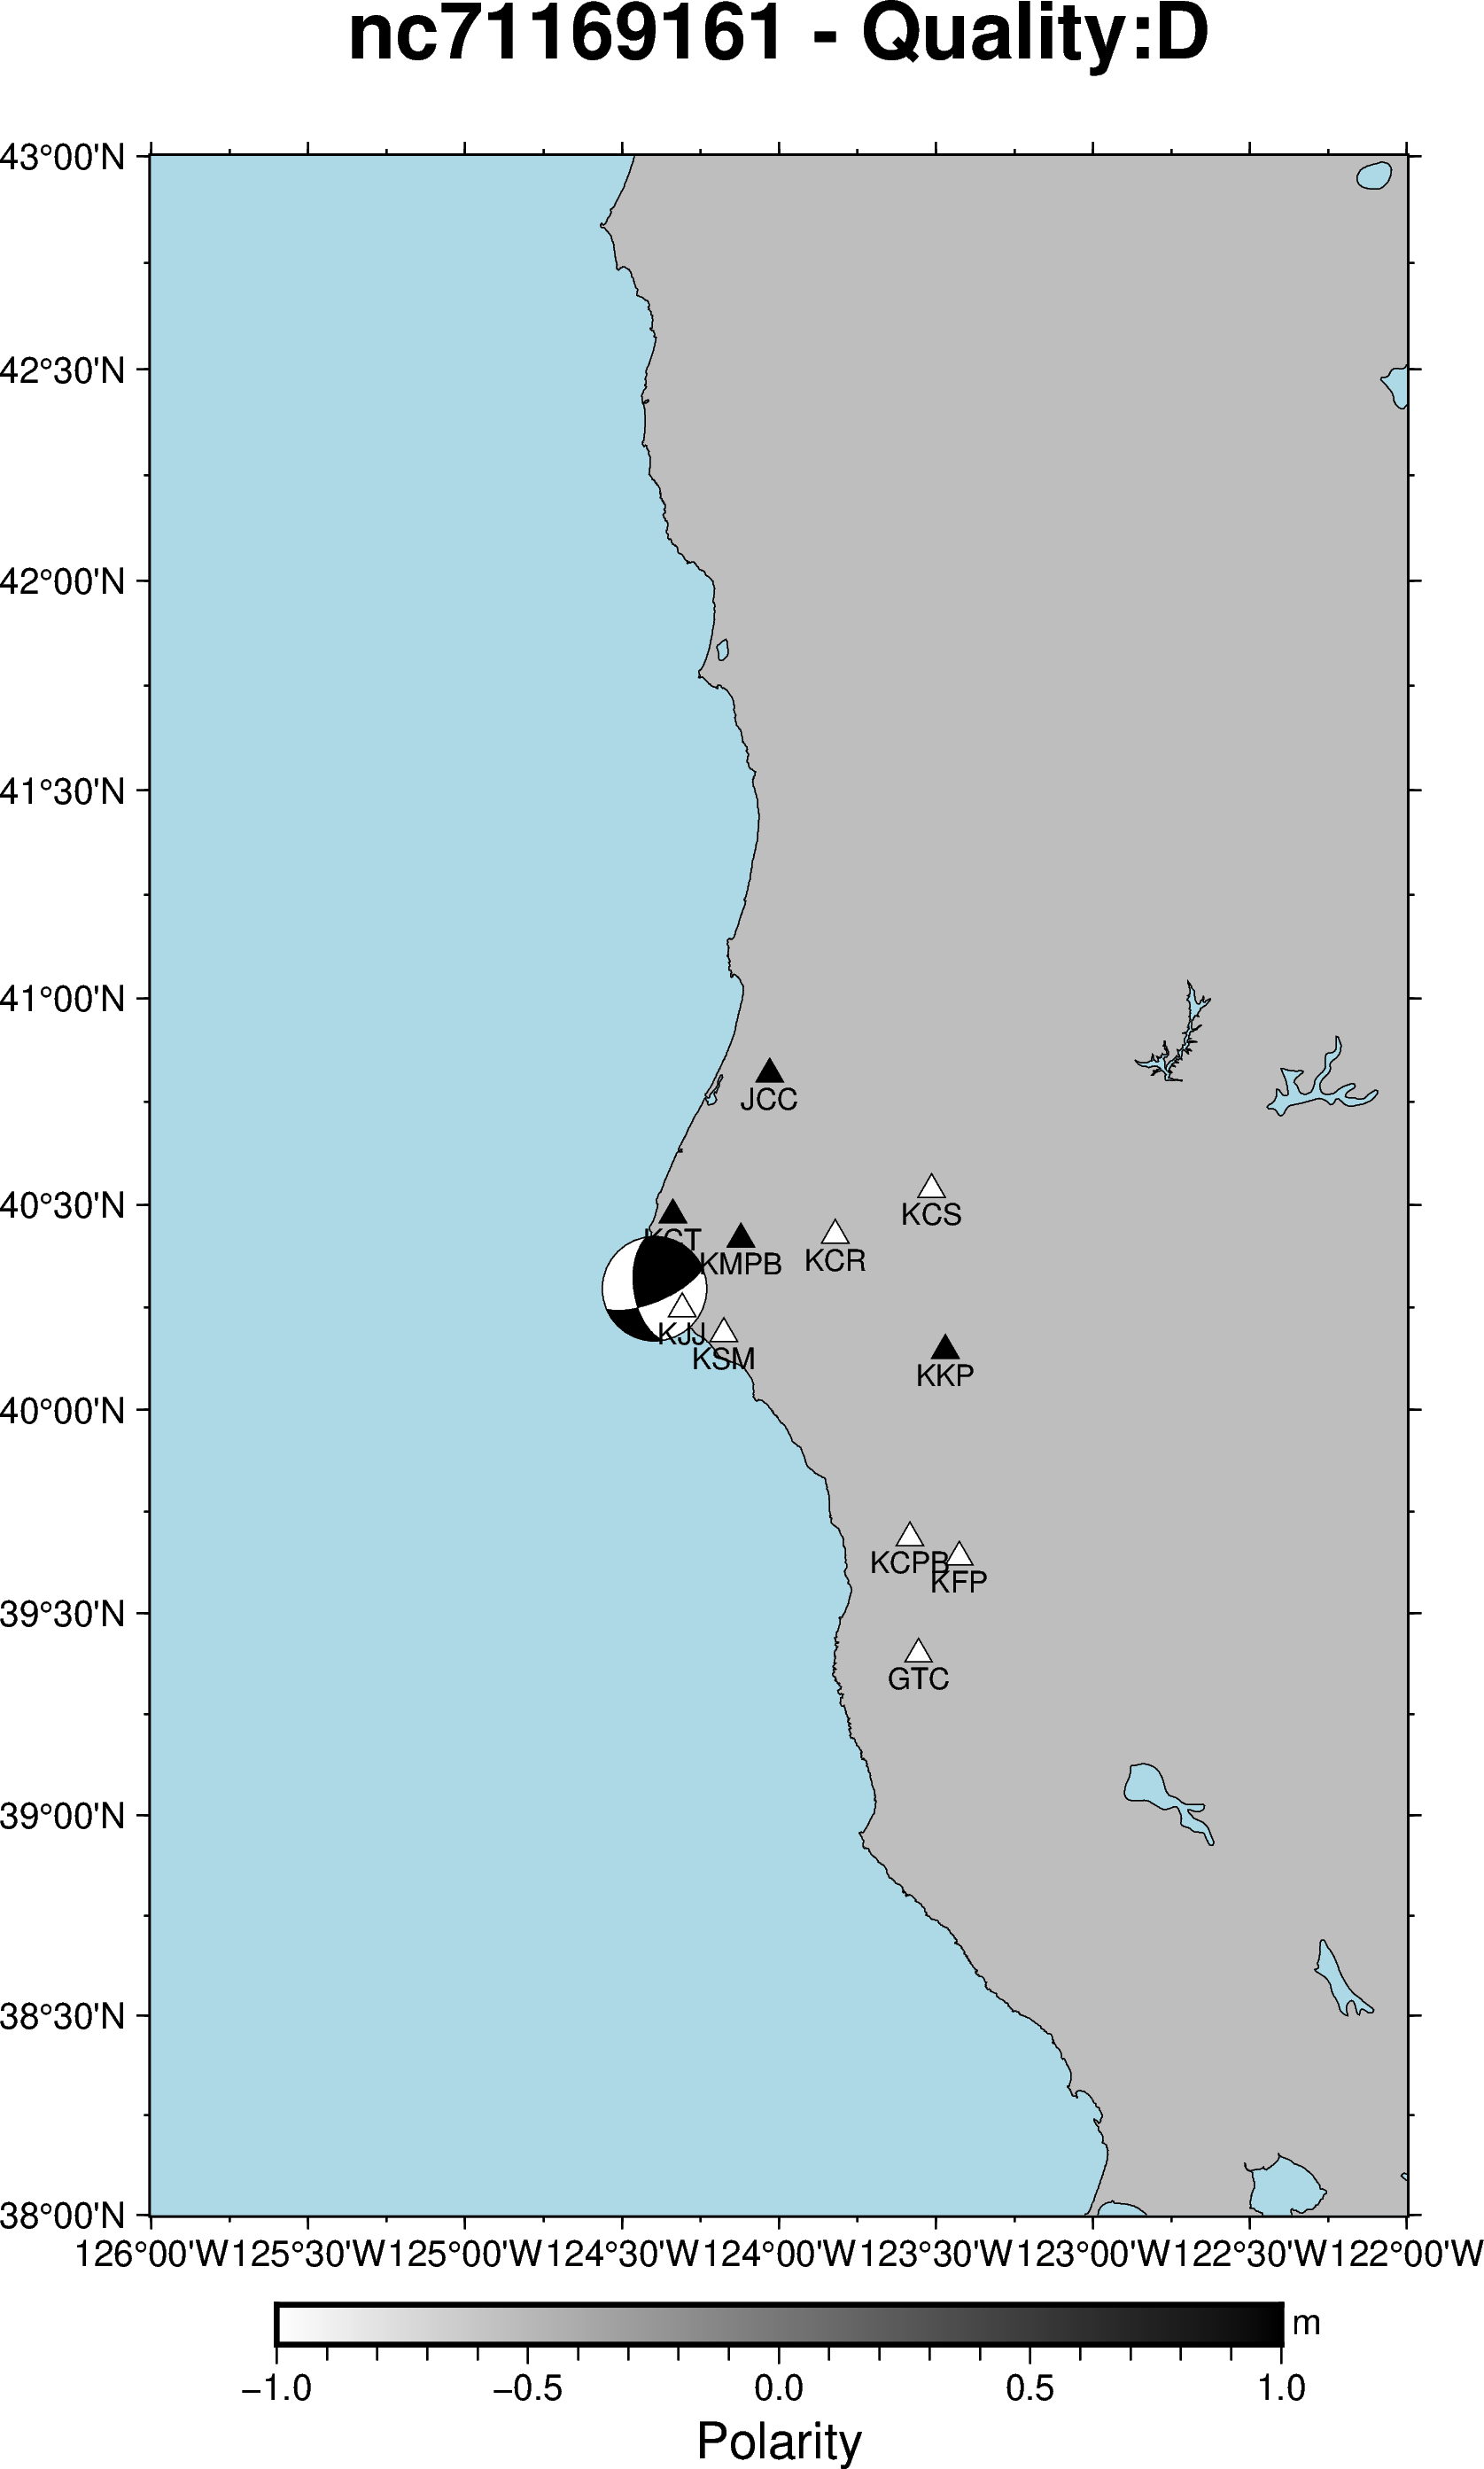

time taken to plot 81 events: 28.518737077713013 sec


In [9]:
year_path = "../results/foc_mech/NCEDC_comp/2008"
ev_dirs = os.listdir(year_path)                 # to save the plots inside the event directories

import time
t1 = time.time()
for i, row in fm_df.iterrows():
    event_sta_pol_df, elat, elon, edep = plot_FM.get_sta_lat_lon_pol(
        event_id=row['event_id'],
        skhash_pol_file=sk_pol_file,
        sta_inv_file=sta_inv_file
    )
    fig = plot_FM.plot_FM_stations(
        event_id=row['event_id'],
        event_sta_pol_df=event_sta_pol_df,
        elat=elat, elon=elon, edep=edep,
        strike=row.strike, dip=row.dip, rake=row.rake,
        magnitude=row.mag,
        region=[-126, -122, 38, 43],
    )
    fig.basemap(frame=[f"+t{row.event_id} - Quality:{row.quality}"])
    fig.savefig(f"{year_path}/{row.event_id}/{row.event_id}_stations_pol.png")

    # break
fig.show()
print(f'time taken to plot {len(fm_df)} events: {time.time()-t1} sec')